In [2]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from astropy.stats import biweight_location, biweight_scale, bootstrap
from astropy.cosmology import LambdaCDM
from astropy.coordinates import angular_separation
from astLib import astStats as ast
cosmo = LambdaCDM(H0=70 * u.km / u.Mpc / u.s, Om0=0.30, Ode0=0.70)  # define cosmology

from colossus.cosmology import cosmology

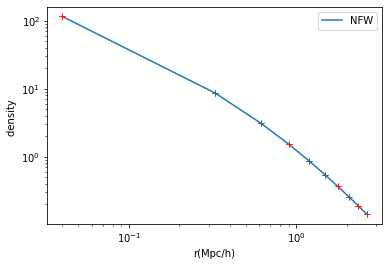

In [2]:
import numpy as np

def profile_nfw(r):
    """
    get NFW density profile
    """    
    Rs = 1 #Rvir / c
    rhos=5
    return rhos / ((r / Rs )* (1 + (r / Rs) ) **2 )
r = np.linspace(0.04,2.63,10)
rho=profile_nfw(r)
plt.plot(r,rho,'+',color='#d62728',)
plt.yscale('log')
plt.xscale('log')

#
from colossus.halo import profile_nfw
cosmology.setCosmology('planck18')
rs = 1
rhos = 5
prof = profile_nfw.NFWProfile(rhos = rhos, rs = rs)

rho_nfw = prof.density(r)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('r(Mpc/h)')
plt.ylabel('density ')
plt.plot(r, rho_nfw , '-', label = 'NFW');
plt.plot(r,rho,'+',color='#d62728',)

plt.legend();

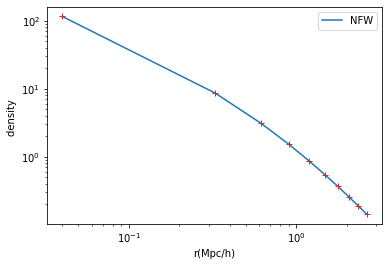

In [3]:
from colossus.halo import profile_nfw
cosmology.setCosmology('planck18')
rs = 1
rhos = 5
prof = profile_nfw.NFWProfile(rhos = rhos, rs = rs)
rho_nfw = prof.density(r)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('r(Mpc/h)')
plt.ylabel('density ')
plt.plot(r, rho_nfw , '-', label = 'NFW');
plt.plot(r,rho,'+',color='#d62728',)

plt.legend();

In [4]:
r

array([0.04      , 0.32777778, 0.61555556, 0.90333333, 1.19111111,
       1.47888889, 1.76666667, 2.05444444, 2.34222222, 2.63      ])

In [5]:
from colossus.halo import profile_nfw
cosmology.setCosmology('planck18')

rs = 1
rhos = 5
prof = profile_nfw.NFWProfile(rhos = rhos, rs = rs)

# taking a dataset to model 
rho_data = prof.density(r)
#sigma = 0.25 * rho_data
rho_data


array([115.56952663,   8.65246211,   3.11213878,   1.52789061,
         0.87435727,   0.55019968,   0.36974449,   0.26086219,
         0.19110465,   0.1442783 ])

In [6]:
import matplotlib as mpl

from scipy.optimize import minimize

from astropy.cosmology import FlatLambdaCDM
#from NFW.nfw import NFW
#from NFW import mass_concentration

from colossus.cosmology import cosmology as colossuscosmo
from colossus.halo import concentration


mpl.rcParams.update(mpl.rcParamsDefault)

from ipywidgets import interactive

In [7]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
params = {'flat': True, 'H0': cosmo.H0.value,
          'Om0': cosmo.Om0, 'Ob0': 0.046,
          'sigma8': 0.81, 'ns': 0.95}
colossus_cosmo = colossuscosmo.setCosmology('myCosmo', params)

In [8]:
prof.density?

In [9]:
prof.fit?

In [10]:
prof.density(r)

array([115.56952663,   8.65246211,   3.11213878,   1.52789061,
         0.87435727,   0.55019968,   0.36974449,   0.26086219,
         0.19110465,   0.1442783 ])

In [11]:
from colossus.halo import profile_nfw
cosmology.setCosmology('planck18')

rhos = 1
rs = 5
prof = profile_nfw.NFWProfile(rhos = rhos, rs = rs)

# taking a dataset to model 
rho_data = prof.density(r)

rr = np.arange(0.1, 1.45, 0.1)

sigma = 0.25 * rho_data


# Move the profile parameters away from the initial values
prof.setParameterArray([prof.par['rhos'] * 0.4, prof.par['rs'] * 3.0])

# Fit to the fake data using least-squares, compute the fitted profile
prof.fit(r, rho_data, 'rho', q_err = sigma, method = 'leastsq')
rho_fit_leastsq = prof.density(rr)

# Fit to the fake data using MCMC, compute the fitted profile
#fit_results = prof.fit(r, rho_data, 'rho', q_err = sigma, method = 'mcmc', convergence_step = 500)
#rho_fit_mcmc = prof.density(rr)

plt.figure()
plt.loglog()
plt.xlabel('r(Mpc/h)')
plt.ylabel('Density')
plt.errorbar(r, rho_data, yerr = sigma, fmt = 'o', ms = 5.0)
plt.plot(rr, rho_fit_leastsq, '-', label = 'least-squares')
#plt.plot(rr, rho_fit_mcmc, '--', label = 'mcmc')

plt.legend()
plt.show()

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Found analytical derivative function for quantity rho.
Found solution in 5 steps. Best-fit parameters:
Parameter       rhos = 1.00e+00 [1.00e+00 .. 1.00e+00]
Parameter         rs = 5.00e+00 [5.00e+00 .. 5.00e+00]
chi2 / Ndof = 0.0 / 8 = 0.00
-------------------------------------------------------------------------------------


KeyboardInterrupt: 

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Found analytical derivative function for quantity rho.
Found solution in 7 steps. Best-fit parameters:
Parameter       rhos = 9.06e-01 [5.82e-01 .. 1.41e+00]
Parameter         rs = 1.02e+00 [8.20e-01 .. 1.26e+00]
chi2 / Ndof = 9.1 / 8 = 1.14
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Running MCMC with the following settings:
Number of parameters:                      2
Number of walkers:                       100
Save conv. indicators every:             500
Finish when Gelman-Rubin less than:   0.0100
-------------------------------------------------------------------------------------
Step    100
Step    200
Step    300
Step    400
Step    500, autocorr. time  24.4, GR = [  1.066  1.059]
Step    6

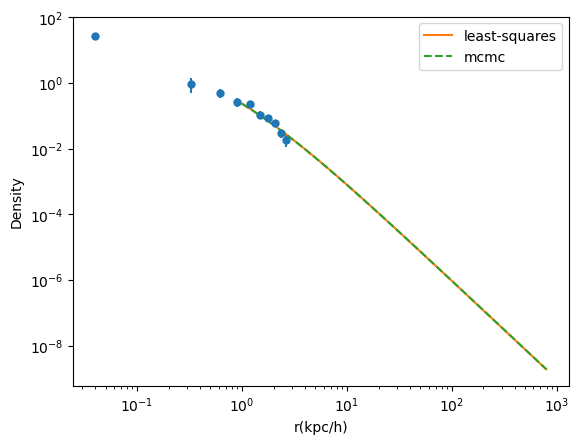

In [12]:
rhos = 1
rs = 1
prof = profile_nfw.NFWProfile(rhos = rhos, rs = rs)

# Create a fake dataset with some noise

rr = 10**np.arange(0.0, 3.0, 0.1)
rho_data = prof.density(r)
sigma = 0.25 * rho_data
np.random.seed(156)
rho_data += np.random.normal(0.0, sigma, len(r))

# Move the profile parameters away from the initial values
prof.setParameterArray([prof.par['rhos'] * 0.4, prof.par['rs'] * 3.0])

# Fit to the fake data using least-squares, compute the fitted profile
prof.fit(r, rho_data, 'rho', q_err = sigma, method = 'leastsq')
rho_fit_leastsq = prof.density(rr)

# Fit to the fake data using MCMC, compute the fitted profile
fit_results = prof.fit(r, rho_data, 'rho', q_err = sigma, method = 'mcmc', convergence_step = 500)
rho_fit_mcmc = prof.density(rr)

plt.figure()
plt.loglog()
plt.xlabel('r(kpc/h)')
plt.ylabel('Density')
plt.errorbar(r, rho_data, yerr = sigma, fmt = 'o', ms = 5.0)
plt.plot(rr, rho_fit_leastsq, '-', label = 'least-squares')
plt.plot(rr, rho_fit_mcmc, '--', label = 'mcmc')
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
from asammdf import MDF

def mf4_to_pd(mf4_file, channels, time_var='Time'):
    channels = [c for c in channels if c != time_var]
    channels = [time_var] + channels
    mdf = MDF(mf4_file, channels=channels)

    # Find channels in the file that are in channels
    file_channels = []
    for group in mdf.groups:
        for channel in group['channels']:
            file_channels.append(channel.name)
    channels = [c for c in channels if c in file_channels]
    sel = mdf.select(channels)
    data = np.array([sel[i].samples for i in range(len(channels))])
    if data.shape[0] == 0:
        return pd.DataFrame({}), False
    df = pd.DataFrame(data.T, columns=channels)
    df.index = df[time_var]
    df.index.names = [time_var]
    df = df.drop([time_var], axis=1)
    return df, True


#path to my file 
mf4_file_path = "20230626_144240_191_2627h.mf4"
channels_to_load = ["Channel1", "Channel2", "Channel3"]  # Add the desired channel names


# load
df, success = mf4_to_pd(mf4_file_path, channels_to_load)

if success:
    print(df)
else:
    print("Failed to load the MF4 file.")


ldf is not supported
xls is not supported


MdfException: "20230626_144240_191_2627h.mf4" is not a valid ASAM MDF file: magic header is b'\n\n\n\n\n\n\n\n'

In [5]:
import numpy as np
import plotly.graph_objs as go
from IPython.display import display, clear_output
import time

# Define simulation parameters
num_particles = 100
num_steps = 100
time_step = 0.1

# Initialize particles with random positions and velocities
particles = np.random.rand(num_particles, 2)

# Create a Plotly figure
scatter = go.Scatter(x=particles[:, 0], y=particles[:, 1], mode='markers')

layout = go.Layout(
    xaxis=dict(range=[0, 1], title='X-axis'),
    yaxis=dict(range=[0, 1], title='Y-axis'),
    title='Interactive Particle Simulation',
)

fig = go.Figure(data=[scatter], layout=layout)

# Display the initial figure
display(fig)

# Define the update function for the animation
def update_simulation():
    global particles  # Declare particles as a global variable
    for _ in range(num_steps):
        # Update particle positions (simple random walk for demonstration)
        particles += np.random.normal(0, 0.01, size=(num_particles, 2))

        # Update scatter plot data


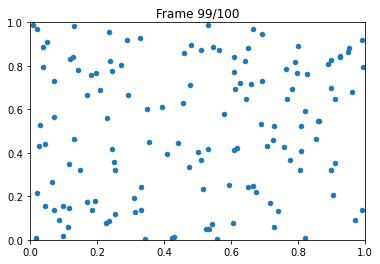

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define simulation parameters
num_particles = 500
num_steps = 100
time_step = 0.1
particle_radius = 0.02

# Initialize particles with random positions and velocities
particles = np.random.rand(num_particles, 2)
velocities = np.random.normal(0, 0.01, size=(num_particles, 2))

# Create a figure and axis for the animation
fig, ax = plt.subplots()

def update(frame):
    global particles, velocities

    # Update particle positions based on velocities
    particles += velocities

    # Apply periodic boundary conditions to keep particles in the frame
    particles = particles % 2.0

    # Clear the axis
    ax.clear()

    # Draw particles as small circles
    ax.scatter(particles[:, 0], particles[:, 1], s=particle_radius * 1000, marker='o')

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Set title for each frame
    ax.set_title(f"Frame {frame}/{num_steps}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=100)

# Display the animation in the Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())
